## Importing Libraries and Data

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
from matplotlib import pyplot as plt

In [ ]:
supply = pd.read_csv('/content/supply.csv')
demand = pd.read_csv('/content/demand.csv')
data = supply.merge(demand,on='DATE')
data.head()

In [ ]:
print(data.info())
data.isna().sum()

## Cleaning Data

In [10]:
data.rename(columns={'CSUSHPISA_x':'Home_price','MSACSR':'Monthly_supply','PERMIT':'Permit'\
                   ,'TLRESCONS':'Total_consumption spending'
                  ,'EVACANTUSQ176N':'Housing_inventory','MORTGAGE30US':'30y_mortgage','UMCSENT':'Consumer_sentiment'\
                   ,'INTDSRUSM193N':'Interest_rates','MSPUS':'Median_sales_price','DATE':'Date'},inplace = True)


data.dropna(inplace=True)
data['Date'] = pd.to_datetime(data['Date'])

In [ ]:
data.drop(columns = ['CSUSHPISA_y'],inplace=True)
data.head()

## Preprocessing

In [108]:
# Specify the columns to be converted to float (excluding 'Date')
convert = [col for col in data.columns if col != 'Date']

# Change the selected columns to float
data[convert] = data[convert].astype(float).round(1)

data.head()

,Home_price,Monthly_supply,Permit,Total_consumption spending,Housing_inventory,30y_mortgage,Consumer_sentiment,Interest_rates,Median_sales_price,GDP
0,129.3,4.2,1806.3,421328.7,14908.0,5.8,80.0,2.2,186000.0,11174.1
1,131.8,3.8,1837.7,429308.7,15244.0,5.5,89.3,2.2,191800.0,11312.8
2,135.0,3.6,1937.3,458890.0,15614.0,6.0,89.3,2.0,191900.0,11566.7
3,138.8,4.0,1972.3,491437.3,15654.0,5.9,92.0,2.0,198800.0,11772.2
4,143.3,3.7,1994.7,506856.3,15895.0,5.6,98.0,2.0,212700.0,11923.4


## Data Visualization

[Text(0.5, 1.0, 'Median_sales_price over the years')]

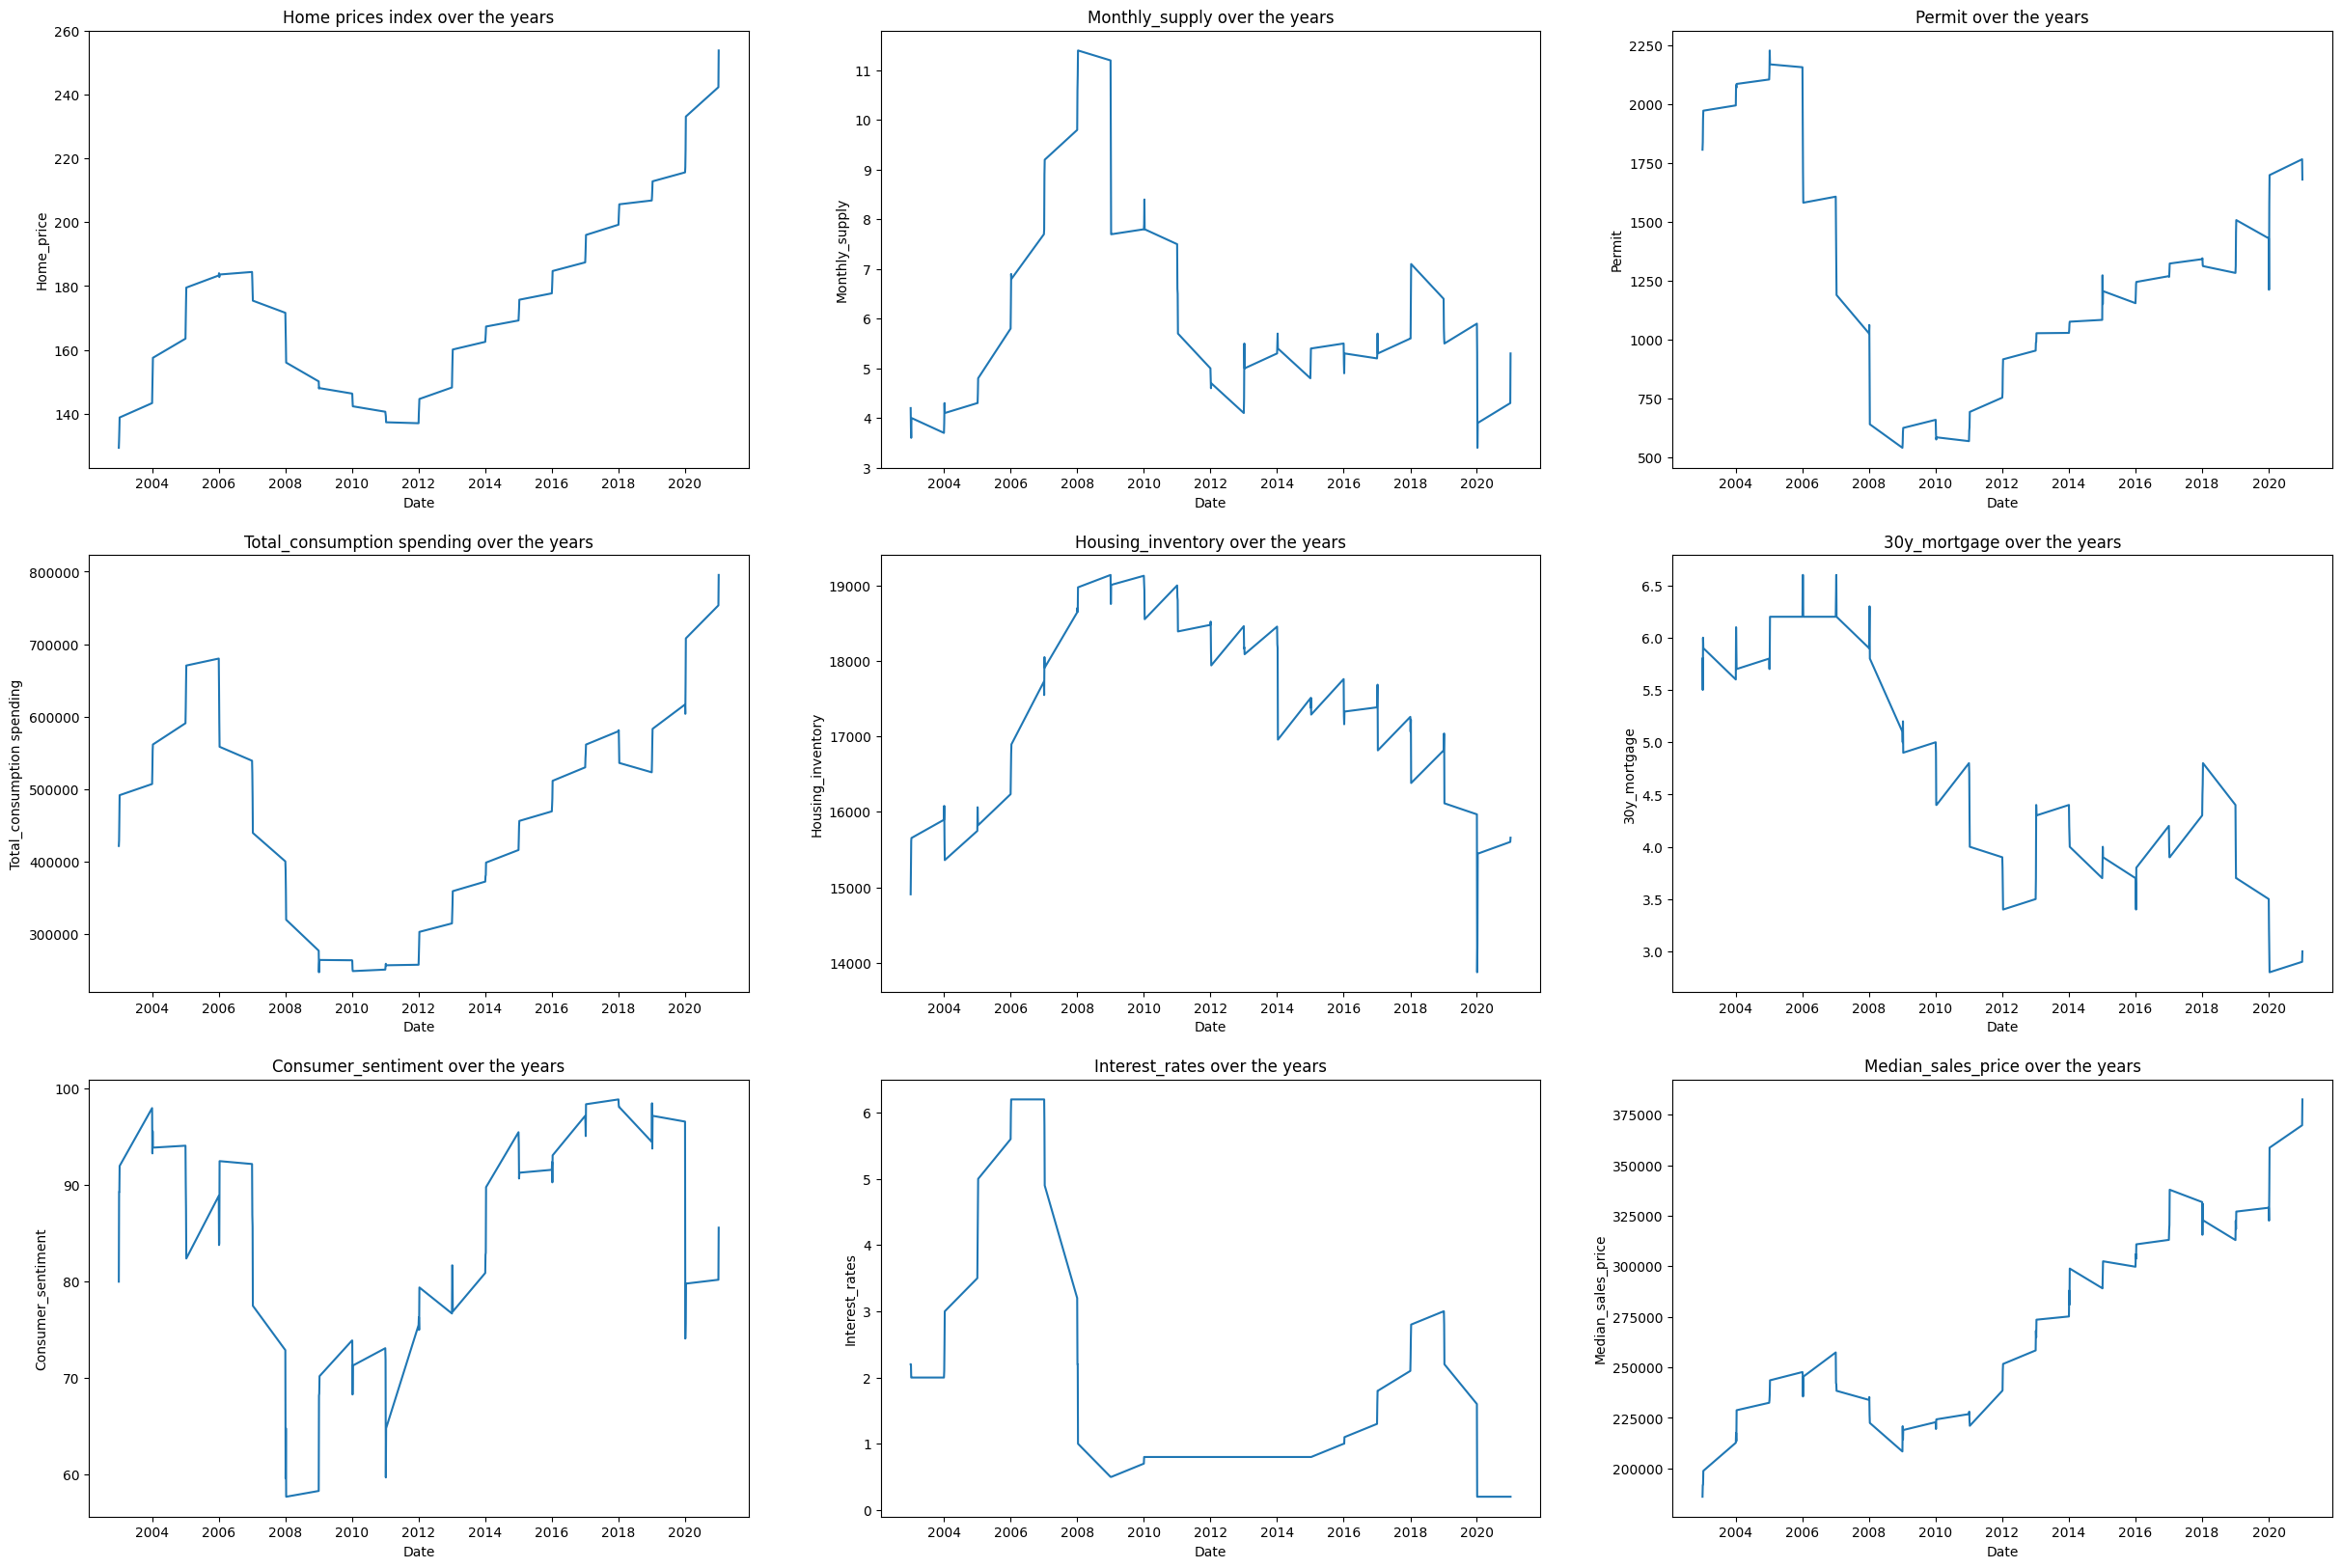

In [21]:
#Visualizing all data
figure,ax = plt.subplots(nrows=3,ncols=3,figsize=(30,20))

sns.lineplot(ax = ax[0,0], data=data, x='Date', y='Home_price').set(title='Home prices index over the years')
sns.lineplot(ax = ax[0,1], data=data, x='Date', y='Monthly_supply').set(title='Monthly_supply over the years')
sns.lineplot(ax = ax[0,2], data=data, x='Date', y='Permit').set(title='Permit over the years')
sns.lineplot(ax = ax[1,0], data=data, x='Date', y='Total_consumption spending').set(title='Total_consumption spending over the years')
sns.lineplot(ax = ax[1,1], data=data, x='Date', y='Housing_inventory').set(title='Housing_inventory over the years')
sns.lineplot(ax = ax[1,2], data=data, x='Date', y='30y_mortgage').set(title='30y_mortgage over the years')
sns.lineplot(ax = ax[2,0], data=data, x='Date', y='Consumer_sentiment').set(title='Consumer_sentiment over the years')
sns.lineplot(ax = ax[2,1], data=data, x='Date', y='Interest_rates').set(title='Interest_rates over the years')
sns.lineplot(ax = ax[2,2], data=data, x='Date', y='Median_sales_price').set(title='Median_sales_price over the years')


[Text(0.5, 1.0, 'GDP over the years')]

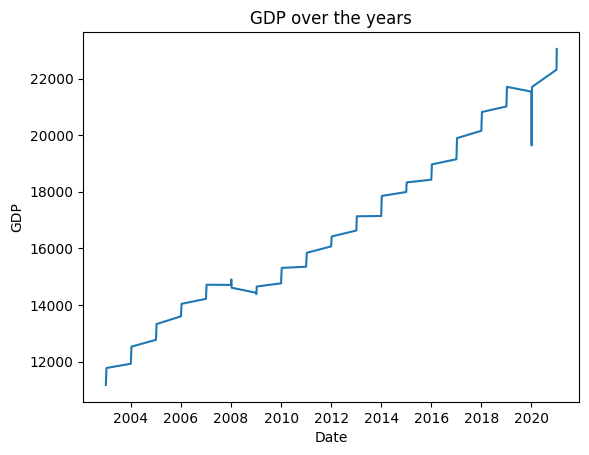

In [22]:
sns.lineplot(data=data, x='Date', y='GDP').set(title='GDP over the years')

# **ML MODEL**

In [ ]:
data = data.drop('Date',axis=1)

In [112]:
x = data.drop('Home_price',axis=1)
y = data['Home_price']


In [113]:
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.linear_model import LinearRegression, Ridge, Lasso, LogisticRegression
from sklearn.neighbors import KNeighborsRegressor, KNeighborsClassifier, NearestNeighbors
from sklearn import metrics
from sklearn.pipeline import Pipeline
from sklearn.metrics import r2_score, classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor

In [128]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=2)


print(x_train.shape)
print(x_test.shape)

(51, 9)
(23, 9)


In [129]:

scaler = StandardScaler()
x_train_scaled =  scaler.fit_transform(x_train)
x_test_scaled = scaler.fit_transform(x_test)

In [130]:
#RandomForest

regress = RandomForestRegressor(n_estimators=100, max_depth=5)
regress.fit(x_train_scaled, y_train)
y_pred = regress.predict(x_test_scaled)
y_pred
r2_score (y_test, y_pred)

0.8937276989106406

In [140]:
#RIDGE

ridge_reg = Ridge(alpha=10)
ridge_reg.fit(x_train_scaled, y_train)
y_pred = ridge_reg.predict(x_test_scaled)
ridge_reg.score(x_test_scaled, y_test)

0.87794156668858

In [141]:
#GBR

gb_reg = GradientBoostingRegressor(n_estimators=100, max_depth=3, learning_rate=0.1)
gb_reg.fit(x_train_scaled, y_train)
gb_pred = gb_reg.predict(x_test_scaled)
r2_score(y_test, gb_pred)

0.8979902440323547

In [142]:
#LASSO

lasso_model = Lasso(alpha=1)
lasso_model.fit(x_train_scaled, y_train)
y_pred = lasso_model.predict(x_test_scaled)
r2_score(y_test, y_pred)

0.8772082286443776

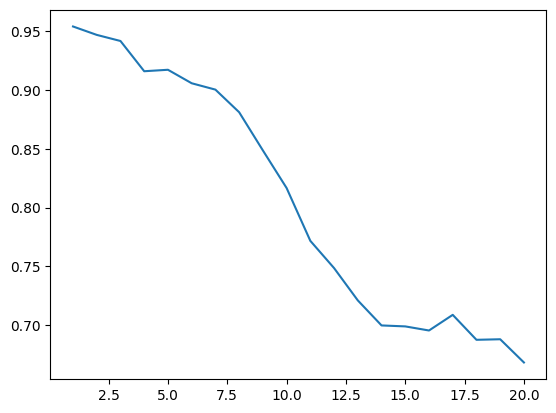

In [135]:
#KNN

k_range = range(1,21)
knn_score = []

for k in k_range :
  knn = KNeighborsRegressor(n_neighbors=k)
  knn.fit(x_train_scaled, y_train)
  knn.pred= knn.predict(x_test_scaled)
  knn_score.append(r2_score (y_test, knn.pred))

plt.plot(k_range,knn_score)

<function matplotlib.pyplot.show(close=None, block=None)>

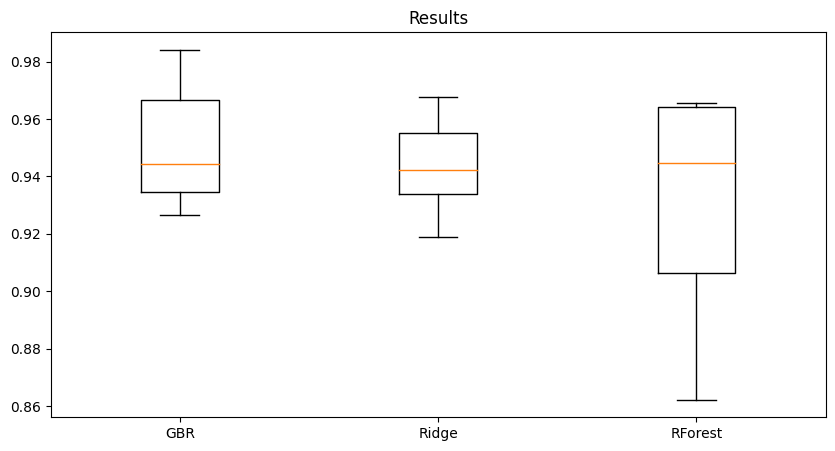

In [134]:
#BOXPLOT

plt.figure(figsize=(10,5))
plt.title('Results')
models={"GBR":gb_reg, "Ridge":ridge_reg, "RForest": regress}

outcome=[]

for model in models.values():
  kf=KFold(n_splits=6, random_state=2, shuffle=True)
  cv_result = cross_val_score(model, x_train_scaled, y_train, cv=kf)
  outcome.append(cv_result)

plt.boxplot(outcome, labels = models.keys())
plt.show

# SUMMARY

The code is designed to provide insights into how various factors, such as housing inventory, mortgage rates, consumer sentiment, interest rates, median sales price, and GDP, have influenced home prices over the last two decades. It does this by both visualizing the trends in these factors and evaluating machine learning models to understand their predictive power. The R-squared scores and cross-validation results can help assess the impact and predictive ability of these factors on home prices.